# UNITED STATES PUBLIC SCHOOL DISTRICT PERFORMANCES
## Sorted by Math and Reading

Global Report Card Data retrieved 2021-08-01 from http://globalreportcard.org/docs/Global-Report-Card-Data-11.14.12.xlsx

From the file:
* These data are generated by linearly extrapolating between two years of test scores.
* These data are generated using 2007 state performance data applied to either 2008 or 2009 national and international testing data.
* State data is from 2004, 2005, and 2007. The 2006 state scores are simply the average between 2005 and 2007 state performance.
* The national data is from NAEP. The included years are 2003, 2005, 2007, and 2009. We similarly substitute the two year average for missing years.
* The international data are from PISA. The years included are 2003, 2006, and 2009.

**Update 2022-03-22:**

The website appears to have expired or been taken down. These data have been cited by Baker *et al.* (2016):

Baker, B.D., D. Farrie, D.G. Sciarra (2016) Mind the Gap: 20 Years of Progress and Retrenchment in
School Funding and Achievement Gaps, *Policy Information Report and ETS Research Report Series*, ISSN 2330-8516, doi:10.1002/ets2.12098.
https://files.eric.ed.gov/fulltext/EJ1124843.pdf

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
sns.set()

In [2]:
def barplot(data, height=0.8, fontsize=12, mark50=True):
    ax = data.plot.barh(figsize=(12,8), width=height, fontsize=fontsize)
    ax.set_xlabel('Percentile', fontsize=fontsize)
    ax.set_ylabel(None)
    if mark50:
        ax.axvline(50)
    return ax

In [3]:
def set_districts(widg):
    options['districts'] = list(widg['new'])
    iplot(options)
    
def set_variables(widg):
    options['variables'] = list(widg['new'])
    iplot(options)

def iplot(options):
    # Configure data
    data = district_data[:]
    if options['sortby']:
        data.sort_values(by=options['sortby'], inplace=True)
    data = data.loc[data.index.isin(options['districts']),
                    options['variables']]
    
    # Make plot
    output.clear_output(wait=True)
    with output:
        ax = data.plot.barh(figsize=(13,7), fontsize=fontsize)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
                  fontsize=fontsize, ncol=3)
        ax.set_xlabel('Percentile', fontsize=fontsize)
        ax.set_ylabel('')
        plt.tight_layout()
        plt.show()    

In [49]:
def set_ts_districts(widg):
    options['districts'] = list(widg['new'])
    timeseries_iplot(options)

def timeseries_iplot(options):
    # Configure data
    data = district_data[:]
    data = data.loc[data.index.isin(options['districts']),
                    data.columns.str.contains(metric)]
    data.columns = data.columns[data.columns.str.contains(metric)].str.strip(metric)
    
    # Make plot
    output.clear_output(wait=True)
    with output:
        ax = data.T.plot(figsize=(13,7), fontsize=fontsize)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
                  fontsize=fontsize, ncol=3)
        ax.set_ylabel('Percentile', fontsize=fontsize)
        ax.set_title(metric, fontsize=fontsize+2)
        plt.tight_layout()
        plt.show()    

***

In [4]:
# Read in and format data
df = pd.read_csv('Global-Report-Card-Data-abridged.csv', header=0)
df.columns = [i.replace('*', '') for i in df.columns]
df = df[df['State'].notnull()]
df = df[df['State Abbreviation'].notnull()]
df['Public District Name'] = [i.strip() for i in df['Public District Name']]
df['Label'] = df[['Public District Name', 'State Abbreviation']].agg(', '.join, axis=1)
df.set_index('State Abbreviation', inplace=True)

## Interactive plots

Comment out districts to hide from plot.

In [5]:
# Extract desired districts
districts = pd.concat([
    df.loc['CT'][df.loc['CT']['Public District Name']=='Torrington'],
#     df.loc['CT'][df.loc['CT']['Public District Name']=='Waterbury'],
    df.loc['MI'][df.loc['MI']['Public District Name']=='Midland'],
    df.loc['MS'][df.loc['MS']['County']=='HARRISON'],
    df.loc['MS'][df.loc['MS']['County']=='JACKSON'],
    df.loc['MS'][df.loc['MS']['County']=='HANCOCK'],
#     df.loc['NC'][df.loc['NC']['County']=='ONSLOW'],
#     df.loc['NC'][df.loc['NC']['Public District Name']=='Carteret County'],
#     df.loc['NC'][df.loc['NC']['County']=='CRAVEN'],
    df.loc['NC'][df.loc['NC']['Public District Name']=='Asheville'],
#     df.loc['SC'][df.loc['SC']['County']=='CHARLESTON'],
    df.loc['FL'][df.loc['FL']['County']=='BREVARD'],
#     df.loc['FL'][df.loc['FL']['County']=='COLLIER'],
#     df.loc['FL'][df.loc['FL']['County']=='LEE'],
#     df.loc['FL'][df.loc['FL']['County']=='MIAMI-DADE'],
    df.loc['DE'][df.loc['DE']['Public District Name']=='Cape Henlopen'],
    df.loc['MA'][df.loc['MA']['Public District Name']=='Mattapoisett'],
    df.loc['MA'][df.loc['MA']['Public District Name']=='Taunton'],
#     df.loc['MA'][df.loc['MA']['Public District Name']=='Plymouth'],
#     df.loc['AR'][df.loc['AR']['Public District Name']=='North Little Rock'],
#     df.loc['MI'][df.loc['MI']['Public District Name']=='Detroit'],
#     df.loc['NY'][df.loc['NY']['Public District Name']=='East Rochester'],
    df.loc['LA'][df.loc['LA']['County']=='ST. TAMMANY'],
#     df.loc['LA'][df.loc['LA']['County']=='EAST CARROLL']
    ])

# Sorted subsets
math_sorted = districts.sort_values(by='2009 National Math Percentile')
reading_sorted = districts.sort_values(by='2009 National Reading Percentile')

### Percentile Bar Plot

Select the data variable to plot. Select multiple variables by holding "command" (Mac) or "ctrl" (Windows) while selecting desired variables, or hold "shift" to capture all variables between two selected variables.

In [6]:
# Years: 2004-2009
# sortby = None
sortby ='2009 National Math Percentile'
# sortby = '2009 Percent Minority'

fontsize = 14

# Data and options
district_data = districts.set_index('Label').iloc[:,6:]*100
district_opts = district_data.index.values
default_locs = ['Mattapoisett, MA', 'Midland, MI', 'Torrington, CT']
series_opts = district_data.columns.values[2:]
default_series = ['2009 National Math Percentile', '2009 National Reading Percentile']
options = {'districts': default_locs,
           'variables': default_series,
           'sortby': sortby}

# Create the menus
var_selector = widgets.SelectMultiple(
    options=series_opts,
    value=[series_opts[1]],
    rows=len(series_opts),
    description='Variables',
    disabled=False)
dist_selector = widgets.SelectMultiple(
    options=district_opts,
    value=[district_opts[1]],
    rows=len(district_opts),
    description='Districts',
    disabled=False)

output = widgets.Output()

var_selector.observe(set_variables, names='value')
dist_selector.observe(set_districts, names='value')

menu = widgets.HBox([var_selector,
                     dist_selector])

# The Layout adds some styling to our app.
# You can add Layout to any widget.
app_layout = widgets.Layout(display='flex',
                flex_flow='column nowrap',
                align_items='center',
                border='none',
                width='100%',
                margin='5px 5px 5px 5px')
 
# The final app is just a box
app = widgets.Box([menu, output], layout=app_layout)
 
# Display the app
print(f"Sorted by {options['sortby']}")
display(app)
iplot(options)

Sorted by 2009 National Math Percentile


Box(children=(HBox(children=(SelectMultiple(description='Variables', index=(1,), options=('2009 Percent Minori…

### Time Series

In [52]:
metric ='National Reading Percentile'

fontsize = 14

# Data and options
district_data = districts.set_index('Label').iloc[:,6:]*100
district_opts = district_data.index.values
default_locs = ['Mattapoisett, MA', 'Midland, MI', 'Torrington, CT']
options = {'districts': default_locs}

# Create the menu
dist_selector = widgets.SelectMultiple(
    options=district_opts,
    value=[district_opts[1]],
    rows=len(district_opts),
    description='Districts',
    disabled=False)

output = widgets.Output()
dist_selector.observe(set_ts_districts, names='value')
menu = widgets.HBox([dist_selector])

# The Layout adds some styling to our app.
# You can add Layout to any widget.
app_layout = widgets.Layout(display='flex',
                flex_flow='column nowrap',
                align_items='center',
                border='none',
                width='100%',
                margin='5px 5px 5px 5px')
 
# The final app is just a box
app = widgets.Box([menu, output], layout=app_layout)
 
# Display the app
display(app)
timeseries_iplot(options)

Box(children=(HBox(children=(SelectMultiple(description='Districts', index=(1,), options=('Torrington, CT', 'M…

***

## Static figures to write to file

Comment out districts to hide from plot.

In [17]:
# Extract desired districts
districts = pd.concat([
    df.loc['CT'][df.loc['CT']['Public District Name']=='Torrington'],
#     df.loc['CT'][df.loc['CT']['Public District Name']=='Waterbury'],
#     df.loc['MI'][df.loc['MI']['Public District Name']=='Midland'],
    df.loc['MS'][df.loc['MS']['County']=='HARRISON'],
    df.loc['MS'][df.loc['MS']['County']=='JACKSON'],
    df.loc['MS'][df.loc['MS']['County']=='HANCOCK'],
#     df.loc['NC'][df.loc['NC']['County']=='ONSLOW'],
#     df.loc['NC'][df.loc['NC']['Public District Name']=='Carteret County'],
#     df.loc['NC'][df.loc['NC']['County']=='CRAVEN'],
#     df.loc['NC'][df.loc['NC']['Public District Name']=='Asheville'],
#     df.loc['SC'][df.loc['SC']['County']=='CHARLESTON'],
#     df.loc['FL'][df.loc['FL']['County']=='BREVARD'],
#     df.loc['FL'][df.loc['FL']['County']=='COLLIER'],
#     df.loc['FL'][df.loc['FL']['County']=='LEE'],
#     df.loc['FL'][df.loc['FL']['County']=='MIAMI-DADE'],
#     df.loc['DE'][df.loc['DE']['Public District Name']=='Cape Henlopen'],
#     df.loc['MA'][df.loc['MA']['Public District Name']=='Mattapoisett'],
    df.loc['MA'][df.loc['MA']['Public District Name']=='Taunton'],
#     df.loc['MA'][df.loc['MA']['Public District Name']=='Plymouth'],
#     df.loc['AR'][df.loc['AR']['Public District Name']=='North Little Rock'],
#     df.loc['MI'][df.loc['MI']['Public District Name']=='Detroit'],
#     df.loc['NY'][df.loc['NY']['Public District Name']=='East Rochester'],
    df.loc['LA'][df.loc['LA']['County']=='ST. TAMMANY'],
    df.loc['LA'][df.loc['LA']['County']=='EAST CARROLL']
    ])

# Sorted subsets
math_sorted = districts.sort_values(by='2009 National Math Percentile')
reading_sorted = districts.sort_values(by='2009 National Reading Percentile')

### Single two-panel plot

In [27]:
import matplotlib.ticker as mticker

/anaconda3/envs/schoolenv/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


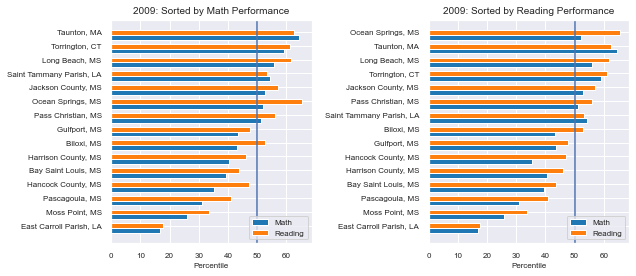

In [29]:
# Two-panel plot
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

y = np.arange(len(math_sorted))
height = 0.35
fontsize = 8

for ax, ds in zip(axs.ravel(), [math_sorted, reading_sorted]):
    ax.barh(y-height/2, ds['2009 National Math Percentile']*100,
             height=height, color='tab:blue', label='Math')
    ax.barh(y+height/2, ds['2009 National Reading Percentile']*100,
             height=height, color='tab:orange', label='Reading')
    ax.set_yticklabels(ds['Label'], fontsize=fontsize)

    ax.axvline(50)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.set_yticks(y + 0.4 / 2)
    ax.set_xlabel('Percentile', fontsize=fontsize)
    ax.legend(loc='best', fancybox=True, fontsize=fontsize)

[ax1, ax2] = axs.ravel()
ax1.set_title('2009: Sorted by Math Performance', fontsize=fontsize+2)
ax2.set_title('2009: Sorted by Reading Performance', fontsize=fontsize+2)

plt.tight_layout()
plt.savefig('ranked_performance.png', dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

### Two separate plots

/anaconda3/envs/schoolenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


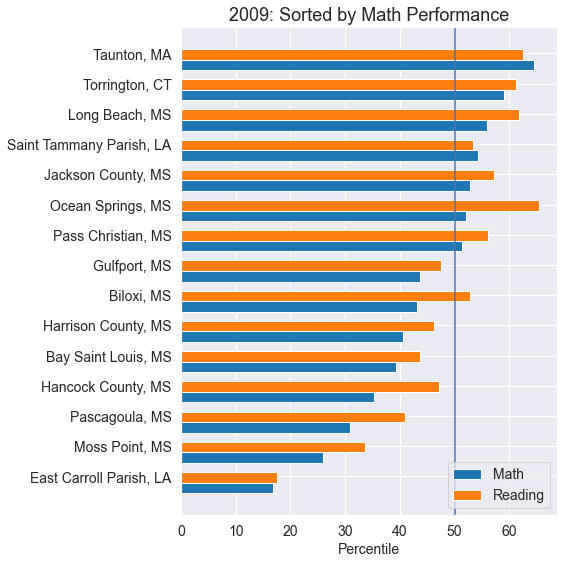

In [31]:
# Math performance
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

y = np.arange(len(math_sorted))
height = 0.35

ax.barh(y-height/2, math_sorted['2009 National Math Percentile']*100,
        height=height, color='tab:blue', label='Math')
ax.barh(y+height/2, math_sorted['2009 National Reading Percentile']*100,
        height=height, color='tab:orange', label='Reading')
ax.set_yticklabels(math_sorted['Label'], fontsize=14)

ax.axvline(50)
ax.tick_params(axis='x', labelsize=14)
ax.set_yticks(y + 0.4 / 2)
ax.set_xlabel('Percentile', fontsize=14)
ax.legend(loc='best', fancybox=True, fontsize=14)
ax.set_title('2009: Sorted by Math Performance', fontsize=18)
plt.tight_layout()
plt.savefig('sorted_bymath.png', dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

/anaconda3/envs/schoolenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


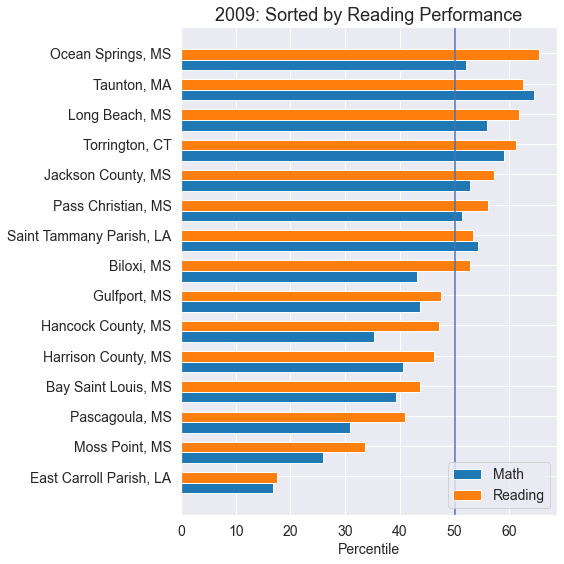

In [32]:
# Reading performance
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

y = np.arange(len(math_sorted))
height = 0.35

ax.barh(y-height/2, reading_sorted['2009 National Math Percentile']*100,
        height=height, color='tab:blue', label='Math')
ax.barh(y+height/2, reading_sorted['2009 National Reading Percentile']*100,
        height=height, color='tab:orange', label='Reading')
ax.set_yticklabels(reading_sorted['Label'], fontsize=14)

ax.axvline(50)
ax.tick_params(axis='x', labelsize=14)
ax.set_yticks(y + 0.4 / 2)
ax.set_xlabel('Percentile', fontsize=14)
ax.legend(loc='best', fancybox=True, fontsize=14)
ax.set_title('2009: Sorted by Reading Performance', fontsize=18)
plt.tight_layout()
plt.savefig('sorted_byreading.png', dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

***